<div style="
    border: 2px solid #4CAF50;
    border-radius: 30px;
    background-color: #f0f8f0;
    padding: 10px;
    text-align: center;
    font-family: Arial, sans-serif;
    color: #4CAF50;
    font-size: 30px;
    font-weight: bold;
">
    Performance Clustering of Maritime Vessels
</div>

# Project Introduction  
**Title:** Analyzing Ship Performance: Weekly Insights (June 2023 – June 2024)  

## Background  
Shipping is vital for trade in West Africa, but inefficiencies can lead to higher costs and delays. This project uses data-driven analysis to evaluate ship performance and identify improvement opportunities.  

## Objective  
Analyze weekly ship performance metrics (speed, engine power, costs, efficiency) to uncover trends and provide actionable insights for optimization.  

---

# Scope and Approach  

### Data Overview  
- Simulated weekly data for 4 SHIP TYPES in West Africa waterways.  
- Metrics include speed, engine power, cargo weight, and operational costs.  

### Steps  
1. **EDA:**  
   - Feature distributions and time-based trends.  
   - Multivariate analysis (pair plots, PCA).  

2. **Clustering Analysis:**  
   - K-Means clustering with silhouette and PCA scores for validation.  

3. **Cluster Profiling:**  
   - Numerical and categorical summaries to define cluster characteristics.  

4. **Evaluation Metrics:**  
   - Silhouette Scores and PCA visualization to validate cluster quality.  

5. **Final Deliverables:**  
   - Presentation with visuals and recommendations.  
   - Exported dataset with clusters.  
   - Comprehensive project report.  

---
### Dataset Schema
The dataset contains the following columns, capturing essential information on ship performance:

| **Column Name**               | **Description**                                    | **Example**               |
|--------------------------------|----------------------------------------------------|---------------------------|
| `Date`                        | Timestamp of the data entry                        | 2024-01-15                |
| `Ship_Type`                   | Type of vessel                                     | Fish Carrier              |
| `Route_Type`                  | Type of route (e.g., Long-haul or Short-haul)      | Long-haul                 |
| `Engine_Type`                 | Type of ship engine                                | Heavy Fuel Oil (HFO)      |
| `Maintenance_Status`          | Current maintenance condition                     | Fair                      |
| `Speed_Over_Ground_knots`     | Speed of the vessel in knots                      | 18.5                      |
| `Engine_Power_kW`             | Power of the engine in kilowatts                  | 2,200                     |
| `Distance_Traveled_nm`        | Distance covered in nautical miles                | 750                       |
| `Draft_meters`                | Draft of the vessel in meters                     | 10.1                      |
| `Weather_Condition`           | Weather conditions during operations              | Rough                     |
| `Cargo_Weight_tons`           | Weight of cargo in tons                           | 1,020                     |
| `Operational_Cost_USD`        | Cost incurred per voyage in USD                   | 275,000                   |
| `Revenue_per_Voyage_USD`      | Revenue generated per voyage in USD               | 460,000                   |
| `Turnaround_Time_hours`       | Time taken for turnaround operations in hours     | 42                        |
| `Efficiency_nm_per_kWh`       | Efficiency of the vessel (nm per kilowatt-hour)   | 1.03                      |
| `Seasonal_Impact_Score`       | Score indicating seasonal impact                  | 0.99                      |
| `Weekly_Voyage_Count`         | Number of voyages completed weekly                | 5                         |
| `Average_Load_Percentage`     | Average load capacity utilized (in percentage)    | 75.5                      |
| `PCA_Cluster`                 | Cluster assignment after PCA                      | 0                         |


---

# Expected Outcomes  

1. **Cluster Insights:**  
   - Identification of performance groups.  
   - Characteristics of efficient vs. suboptimal clusters.  

2. **Performance Trends:**  
   - Weekly insights into speed, power, and costs.  

3. **Operational Efficiency:**  
   - Factors influencing cost, efficiency, and turnaround time.  

4. **Recommendations:**  
   - Strategies for operational optimization and cost reduction.  


<div style="
    border: 2px solid #4CAF50;
    border-radius: 30px;
    background-color: #f0f8f0;
    padding: 10px;
    text-align: center;
    font-family: Arial, sans-serif;
    color: #4CAF50;
    font-size: 30px;
    font-weight: bold;
">
    Data Simulation Overview
</div>

In [42]:
# Importing Libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Parameters
ship_types = ["Container Ship", "Tanker", "Bulk Carrier", "Fish Carrier"]
route_types = ["Short-haul", "Long-haul", "Coastal", "Transoceanic"]
weather_conditions = ["Calm", "Moderate", "Rough"]
engine_types_updated_hfo = ["Diesel", "Heavy Fuel Oil (HFO)", "Steam Turbine"]
maintenance_status = ["Good", "Fair", "Critical"]
weeks = pd.date_range(start="2023-06-01", end="2024-06-30", freq="W")
num_rows = len(ship_types) * len(route_types) * len(weather_conditions) * len(weeks)

# Generate Data
data = { "Date": np.tile(weeks, len(ship_types) * len(route_types) * len(weather_conditions)),
    "Ship_Type": np.random.choice(ship_types, num_rows),
    "Route_Type": np.random.choice(route_types, num_rows),
    "Engine_Type": np.random.choice(engine_types_updated_hfo, num_rows),
    "Maintenance_Status": np.random.choice(maintenance_status, num_rows),
    "Speed_Over_Ground_knots": np.random.uniform(10, 25, num_rows),  # Random speed between 10-25 knots
    "Engine_Power_kW": np.random.uniform(500, 3000, num_rows),  # Engine power between 500-3000 kW
    "Distance_Traveled_nm": np.random.uniform(50, 2000, num_rows),  # Distance between 50-2000 nautical miles
    "Draft_meters": np.random.uniform(5, 15, num_rows),  # Draft between 5-15 meters
    "Weather_Condition": np.random.choice(weather_conditions, num_rows),
    "Cargo_Weight_tons": np.random.uniform(50, 2000, num_rows),  # Cargo weight between 50-2000 tons
    "Operational_Cost_USD": np.random.uniform(10000, 500000, num_rows),  # Cost between $10k-$500k
    "Revenue_per_Voyage_USD": np.random.uniform(50000, 1000000, num_rows),  # Revenue between $50k-$1M
    "Turnaround_Time_hours": np.random.uniform(12, 72, num_rows),  # Turnaround time between 12-72 hours
    "Efficiency_nm_per_kWh": np.random.uniform(0.1, 1.5, num_rows),  # Efficiency between 0.1-1.5 nm/kWh
    "Seasonal_Impact_Score": np.random.uniform(0.5, 1.5, num_rows),  # Seasonal score between 0.5-1.5
    "Weekly_Voyage_Count": np.random.randint(1, 10, num_rows),  # 1-10 voyages per week
    "Average_Load_Percentage": np.random.uniform(50, 100, num_rows),  # Load percentage 50%-100%
}

# Introduce Missing Values
for col in ["Ship_Type", "Route_Type", "Weather_Condition", "Engine_Type", "Maintenance_Status"]:
    missing_indices = np.random.choice(range(num_rows), size=int(num_rows * 0.05), replace=False)
    for idx in missing_indices:
        data[col][idx] = None

# Create DataFrame
df = pd.DataFrame(data)

# Save the updated dataset
file_path = "Ship_Performance_Data.csv"
df.to_csv(file_path, index=False)

print("Dataset with weekly dates saved successfully:", file_path)


Dataset with weekly dates saved successfully: Ship_Performance_Data.csv


<div style="
    border: 2px solid #4CAF50;
    border-radius: 30px;
    background-color: #f0f8f0;
    padding: 10px;
    text-align: center;
    font-family: Arial, sans-serif;
    color: #4CAF50;
    font-size: 25px;
    font-weight: bold;
">
   Basic Checks
</div>


In [44]:
# Loading dataset
data = pd.read_csv("Ship_Performance_Data.csv")
# Let make a copy of the dataset 
df = data.copy()

# Let examine the first few rows of dataset 
df.head()

Date       Ship_Type    Route_Type           Engine_Type  \
0  2023-06-04  Container Ship  Transoceanic         Steam Turbine   
1  2023-06-11          Tanker           NaN                Diesel   
2  2023-06-18    Bulk Carrier     Long-haul         Steam Turbine   
3  2023-06-25    Fish Carrier       Coastal                Diesel   
4  2023-07-02    Fish Carrier    Short-haul  Heavy Fuel Oil (HFO)   

  Maintenance_Status  Speed_Over_Ground_knots  Engine_Power_kW  \
0               Good                19.444767      1488.775889   
1               Fair                17.344798      2120.353189   
2               Good                10.374614      1389.523196   
3           Critical                18.916524      2802.003303   
4           Critical                20.085366      2437.099008   

   Distance_Traveled_nm  Draft_meters Weather_Condition  Cargo_Weight_tons  \
0            554.413419     14.072711               NaN         715.473208   
1            122.847509      6.973967          Moderate         617.420478   
2           1495.028768      9.501105              Calm        1559.543822   
3           1200.335754     14.145588             Rough        1819.405820   
4           1242.883121     14.297183          Moderate         444.722179   

   Operational_Cost_USD  Revenue_per_Voyage_USD  Turnaround_Time_hours  \
0         169102.442777           187521.534900              21.348101   
1         473921.746213           295895.034584              33.032826   
2         116490.856480           168945.997273              71.979598   
3         360762.150061           432882.849142              56.815364   
4         333262.599479           181491.916646              53.631608   

   Efficiency_nm_per_kWh  Seasonal_Impact_Score  Weekly_Voyage_Count  \
0               0.557630               1.418026                    5   
1               1.334478               1.328508                    1   
2               0.441371               1.432761                    5   
3               0.929424               0.811965                    4   
4               0.302885               0.625687                    6   

   Average_Load_Percentage  
0                81.041277  
1                81.646783  
2                52.976186  
3                55.360658  
4                72.347465

In [45]:
# Displaying basic information about the dataset
print("Dataset Information:")
print(df.info())

print("\nSummary Statistics for Numerical Columns:")
print(df.describe())

print("\nSummary for Categorical Columns:")
print(df.describe(include='object'))

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Eff

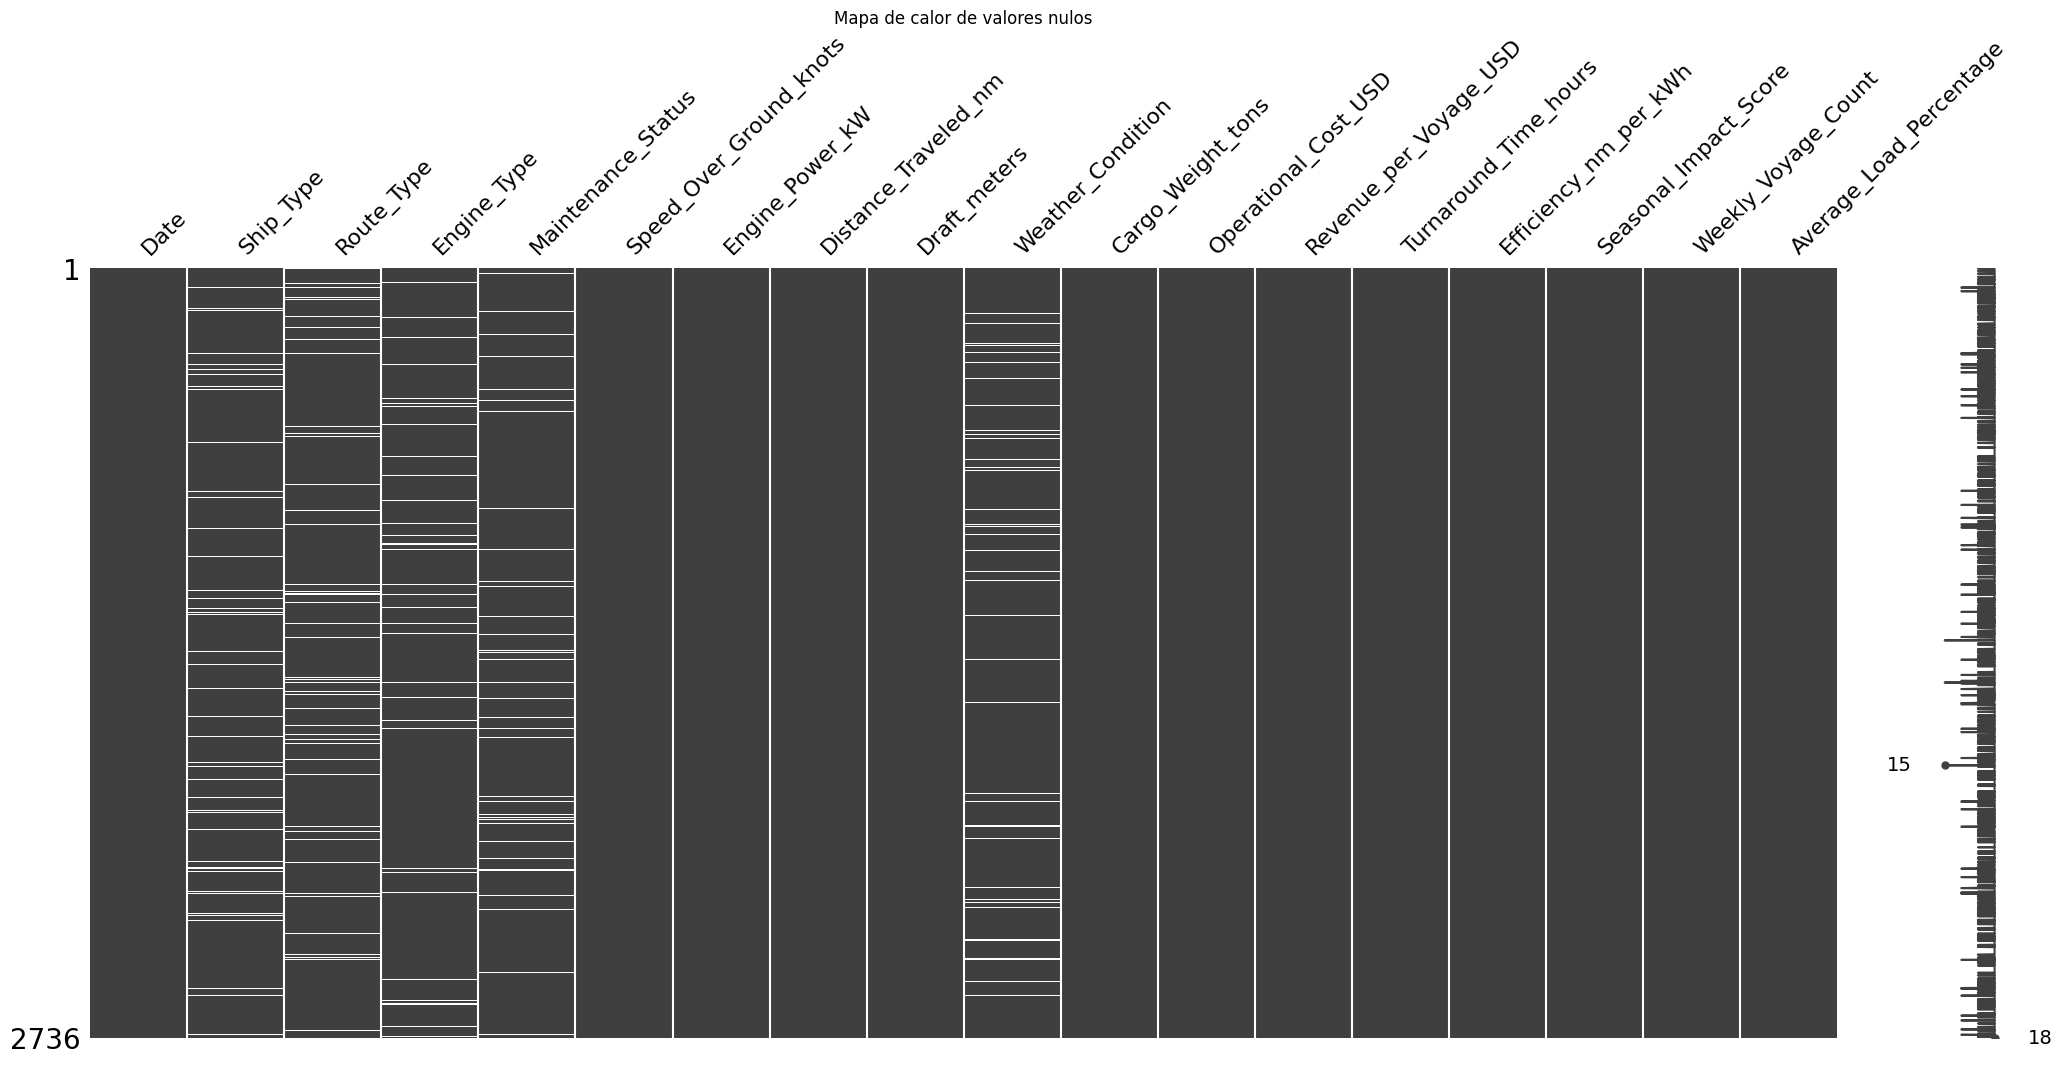

In [46]:
msno.matrix(df)
plt.title("Mapa de calor de valores nulos")
plt.show()


### **Observations**

#### Dataset info:
- The Dataset has shape of 2736 rows × 18 columns
- Has 5 Categorical Features & 13 Numerical Features 

#### Missing Values:
Five categorical columns have 136 missing values each:
- Ship_Type
- Route_Type
- Engine_Type
- Maintenance_Status
- Weather_Condition
#### Data Distribution:
- Numerical features like **Revenue_per_Voyage_USD**, **Operational_Cost_USD**, and **Turnaround_Time_hours** show wide ranges, so we'll check for outliers.
#### Date Column:
- The Date column is an object type. We'll convert it to datetime for analysis.


<div style="
    border: 2px solid #4CAF50;
    border-radius: 30px;
    background-color: #f0f8f0;
    padding: 10px;
    text-align: center;
    font-family: Arial, sans-serif;
    color: #4CAF50;
    font-size: 25px;
    font-weight: bold;
">
    Data Cleaning 
</div>


In [47]:
# Let convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Find columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with Missing Values:", missing_columns)


# Handling missing values for categorical columns
categorical_cols_with_missing = [col for col in df.select_dtypes(include='object').columns if col in missing_columns]

# Filling missing values with mode for each categorical column
for col in categorical_cols_with_missing:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify that missing values have been handled
print("Missing Values After Imputation:")
print(df.isnull().sum())


Columns with Missing Values: ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Weather_Condition']
Missing Values After Imputation:
Date                       0
Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64


<div style="
    border: 2px solid #4CAF50;
    border-radius: 30px;
    background-color: #f0f8f0;
    padding: 10px;
    text-align: center;
    font-family: Arial, sans-serif;
    color: #4CAF50;
    font-size: 25px;
    font-weight: bold;
">
    Exploratory Data Analysis
</div>


In [48]:
# Importing Libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Univariate Analysis**

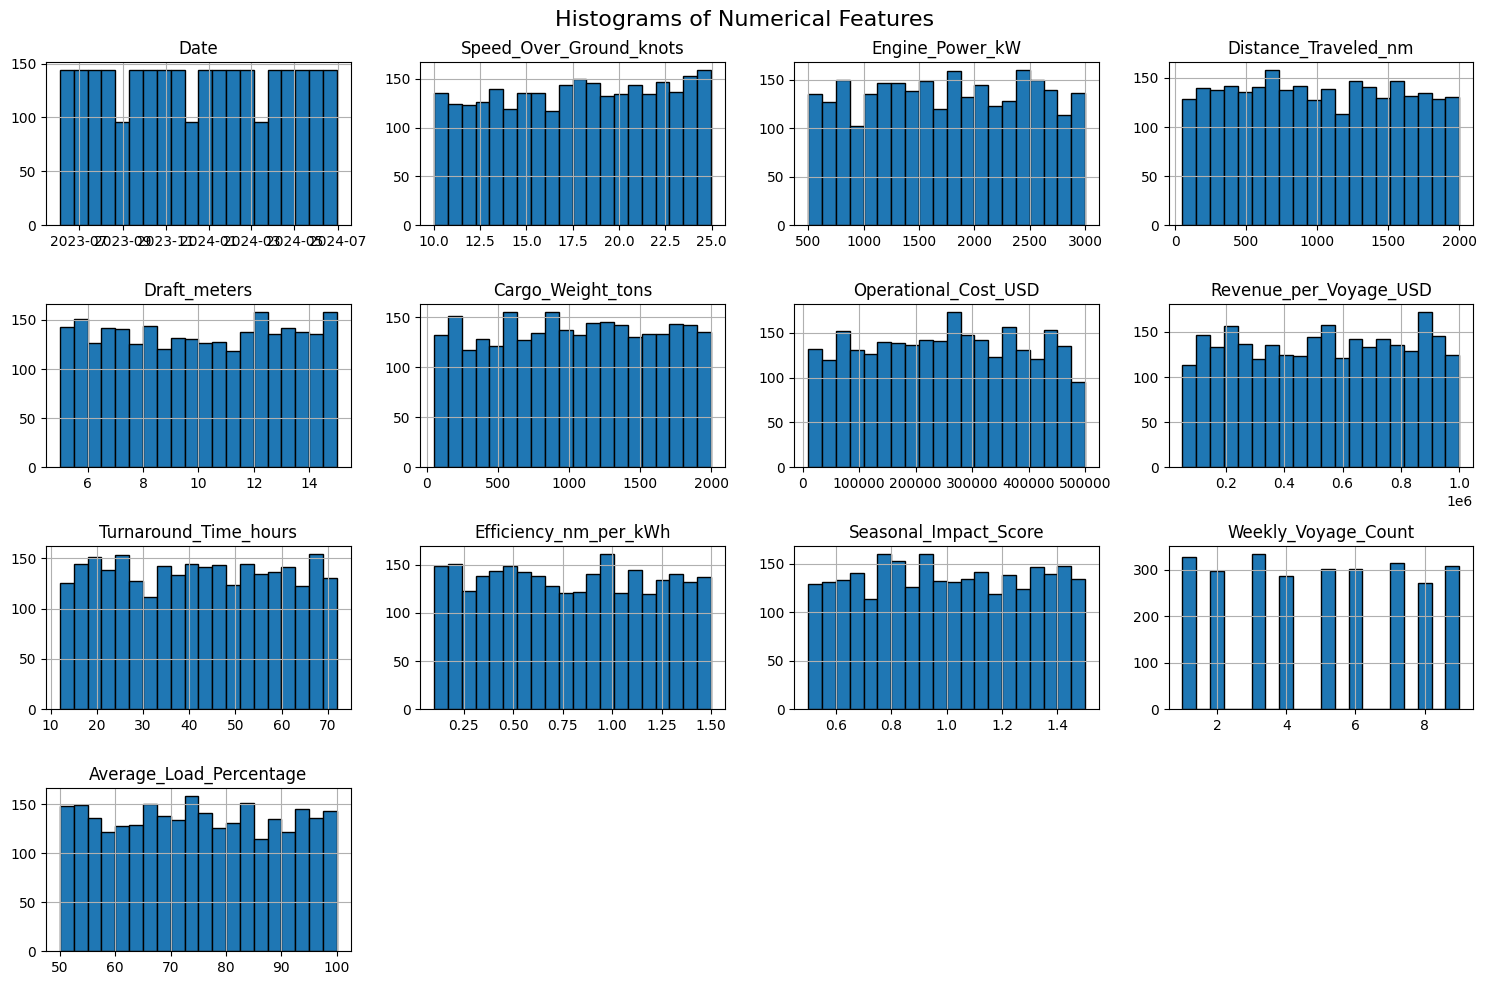

In [49]:
# Creating Numerical features
num_cols = df.select_dtypes(exclude="O")

# Plotting histograms for numerical features
num_cols.hist(bins=20, figsize=(15, 10), edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.savefig("Histograms of Numerical Features", dpi=300, bbox_inches='tight')
plt.show()

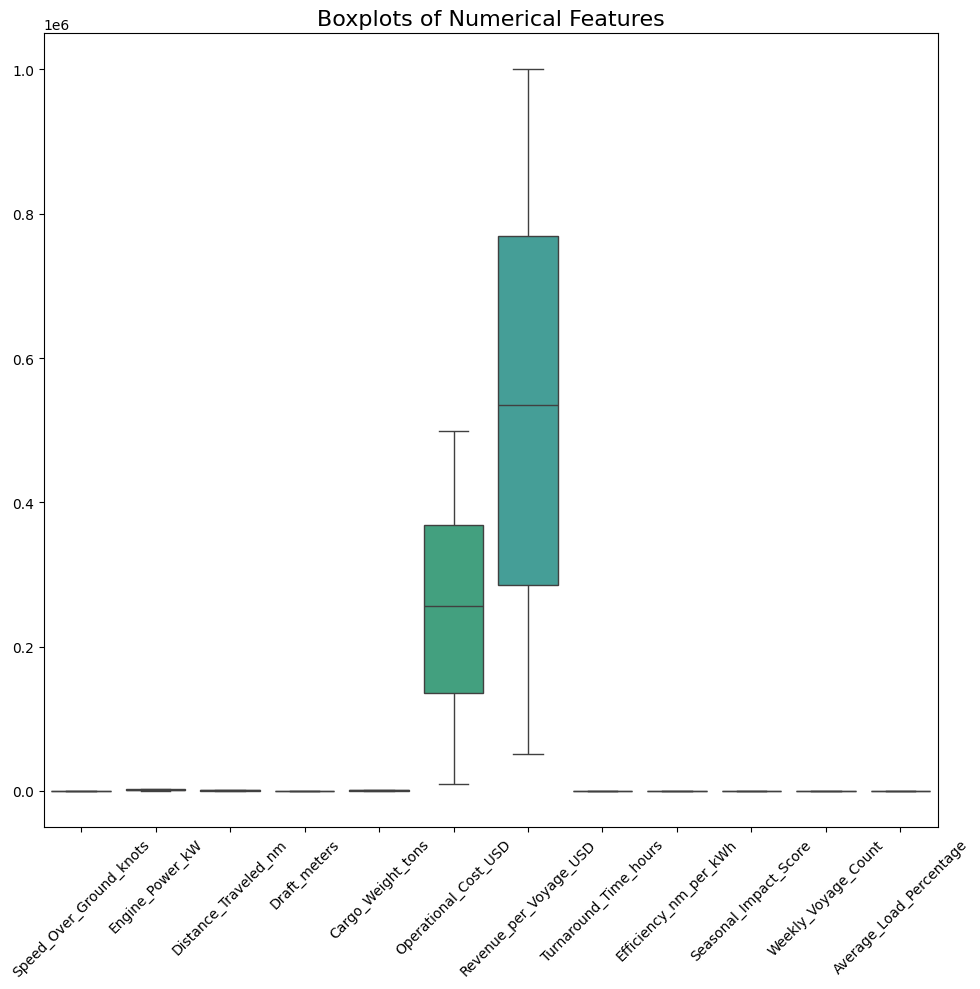

In [50]:
# Boxplots for numerical features
plt.figure(figsize=(10,10))
sns.boxplot(data=num_cols)
plt.title("Boxplots of Numerical Features", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Boxplots of Numerical Features", dpi=300, bbox_inches='tight')
plt.show()


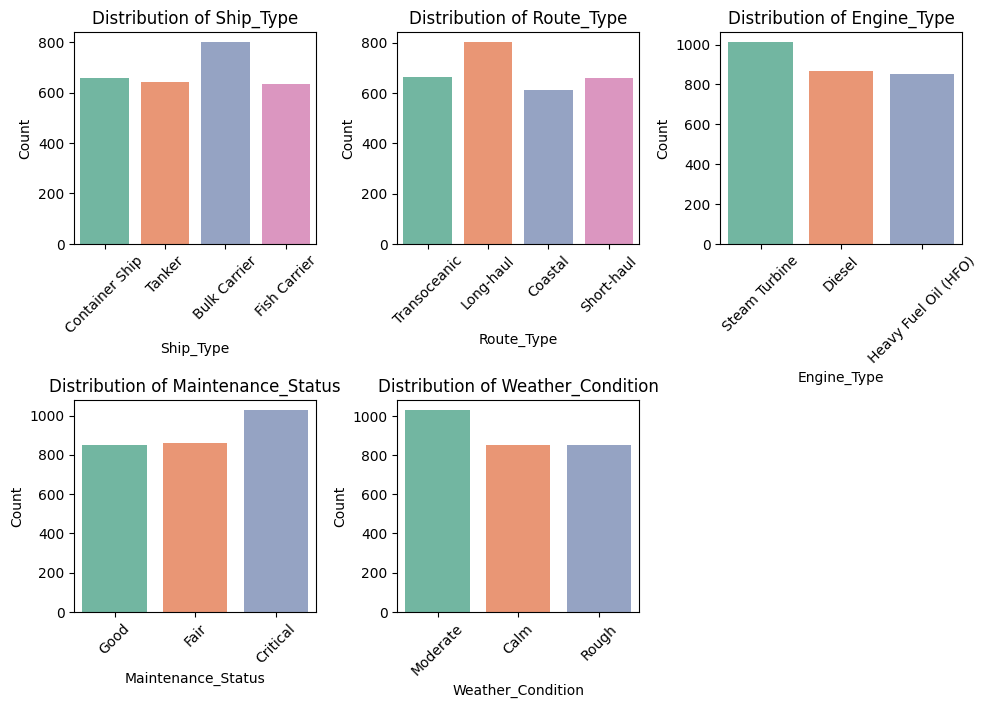

In [51]:
# Defining Categorical features
categorical_cols = df.select_dtypes(include=['object']).columns

# Bar plots for categorical features
# Initializing plot
plt.figure(figsize=(10, 10))
plotnumber = 1

# Looping through each categorical column
for col in categorical_cols: 
    if plotnumber <= len(categorical_cols): 
        ax = plt.subplot(3, 3, plotnumber)  # Creating subplots with 3 rows, 3 columns
        sns.countplot(data=df, x=col, ax=ax, palette="Set2")  # Countplot for each column
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
    plotnumber += 1

plt.tight_layout()
plt.savefig("Categorical_Features_Count_Plot.png", dpi=300, bbox_inches='tight')  # Saving the figure
plt.show()


## **Bivariate Analysis**

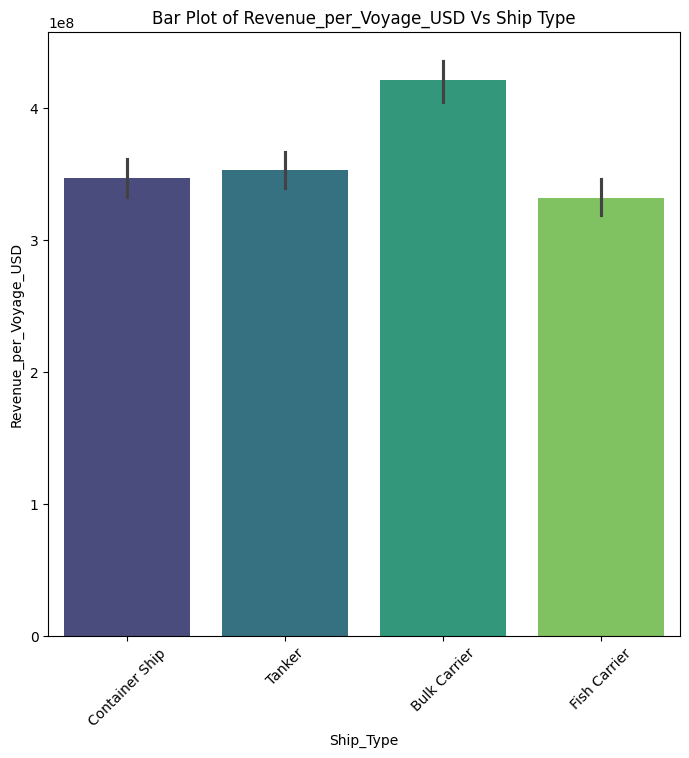

In [52]:
# Let check which Ship type make the highest revenue 
plt.figure(figsize=(7, 7))
sns.barplot(x=df['Ship_Type'], y=df['Revenue_per_Voyage_USD'], estimator=sum, palette='viridis')
plt.title('Bar Plot of Revenue_per_Voyage_USD Vs Ship Type')
plt.tight_layout()
plt.savefig('Bar Plot of Revenue_per_Voyage_USD Vs Ship Type', dpi=300, bbox_inches='tight')
plt.xticks(rotation=45)
plt.show()

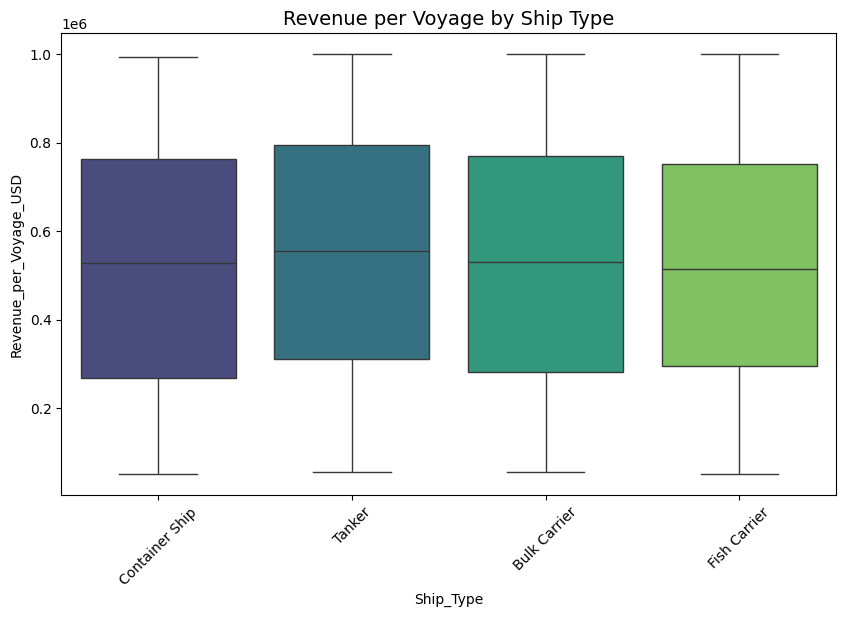

In [53]:
# Revenue vs. Ship Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Ship_Type', y='Revenue_per_Voyage_USD', palette="viridis")
plt.title("Revenue per Voyage by Ship Type", fontsize=14)
plt.xticks(rotation=45)
plt.savefig("Revenue per Voyage by Ship Type.png", dpi=300, bbox_inches='tight')
plt.show()

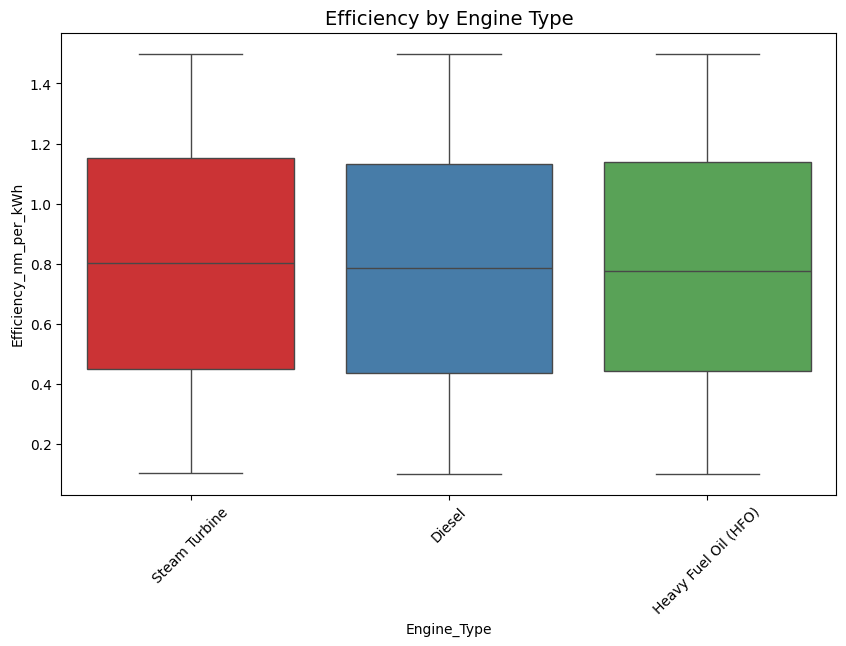

In [54]:
# Efficiency vs. Engine Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Engine_Type', y='Efficiency_nm_per_kWh', palette="Set1")
plt.title("Efficiency by Engine Type", fontsize=14)
plt.xticks(rotation=45)
plt.savefig("Efficiency by Engine Type BoxPlot.png", dpi=300, bbox_inches='tight') 
plt.show()

## **Time-Based Trends**

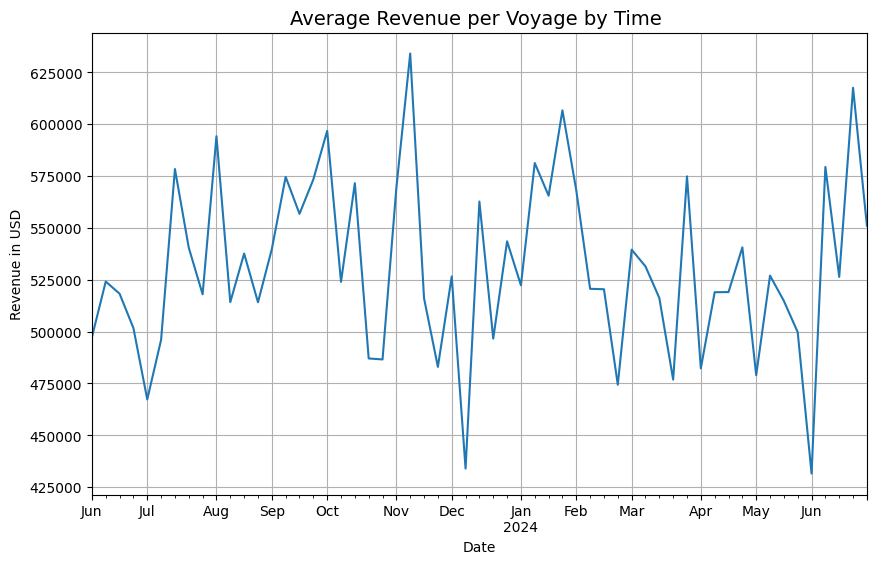

In [55]:
# Revenue over time
plt.figure(figsize=(10, 6))
df.groupby("Date")['Revenue_per_Voyage_USD'].mean().plot()
plt.title("Average Revenue per Voyage by Time ", fontsize=14)
plt.ylabel( "Revenue in USD")
plt.grid() 
plt.savefig("Avearge Revenue per Voyage by Time.png", dpi=300, bbox_inches='tight')
plt.show()



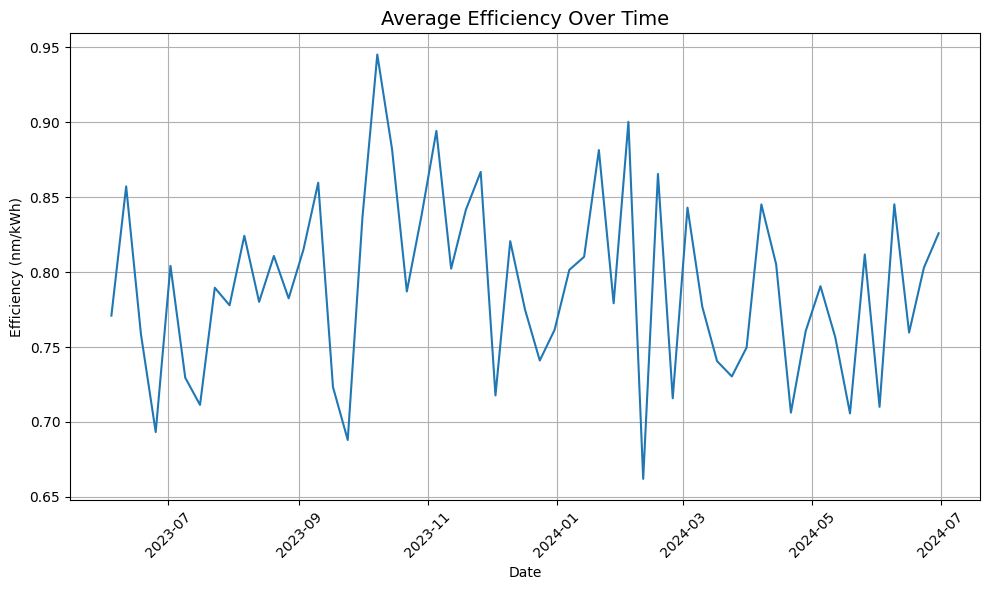

In [56]:
# Efficiency Over Time
plt.figure(figsize=(10, 6)) 
avg_eff_time = df.groupby('Date')["Efficiency_nm_per_kWh"].mean().reset_index()
sns.lineplot(x='Date', y="Efficiency_nm_per_kWh", data=avg_eff_time)
plt.title("Average Efficiency Over Time", fontsize=14)
plt.ylabel("Efficiency (nm/kWh)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()
plt.tight_layout()
plt.savefig("Average Efficiency Over Time.png", dpi=300, bbox_inches='tight')
plt.show()

## **Correlation Analysis**

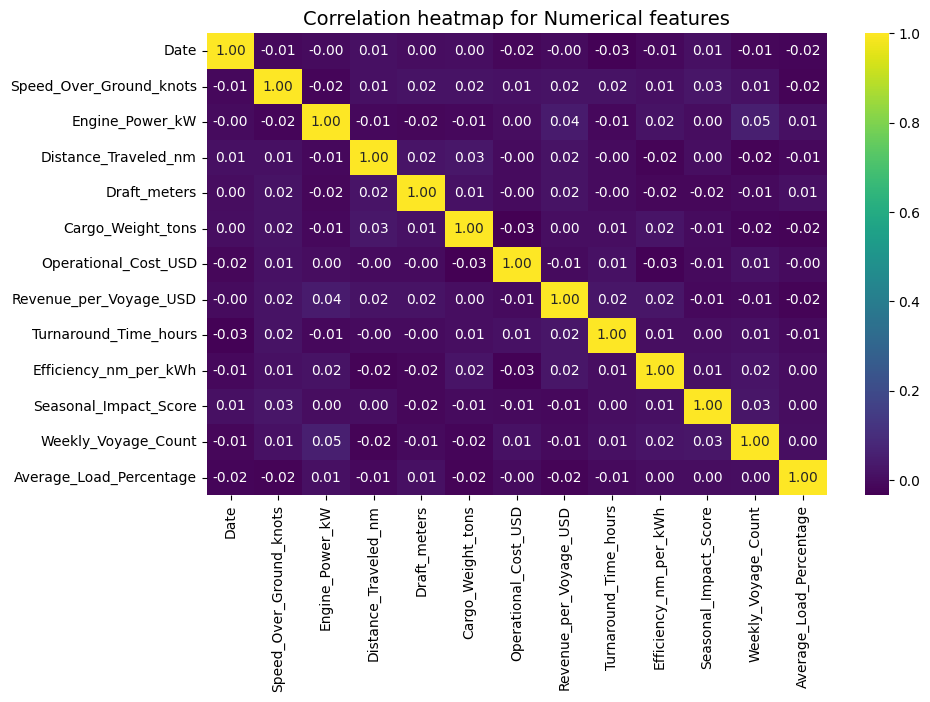

In [57]:
correlation = num_cols.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation heatmap for Numerical features", fontsize=14)
plt.savefig("Correlation heatmap for Numerical features.png", dpi=300, bbox_inches='tight')
plt.show()

## **Multivariant Analysis**

In [58]:
num_cols.columns

Index(['Date', 'Speed_Over_Ground_knots', 'Engine_Power_kW',
       'Distance_Traveled_nm', 'Draft_meters', 'Cargo_Weight_tons',
       'Operational_Cost_USD', 'Revenue_per_Voyage_USD',
       'Turnaround_Time_hours', 'Efficiency_nm_per_kWh',
       'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage'],
      dtype='object')

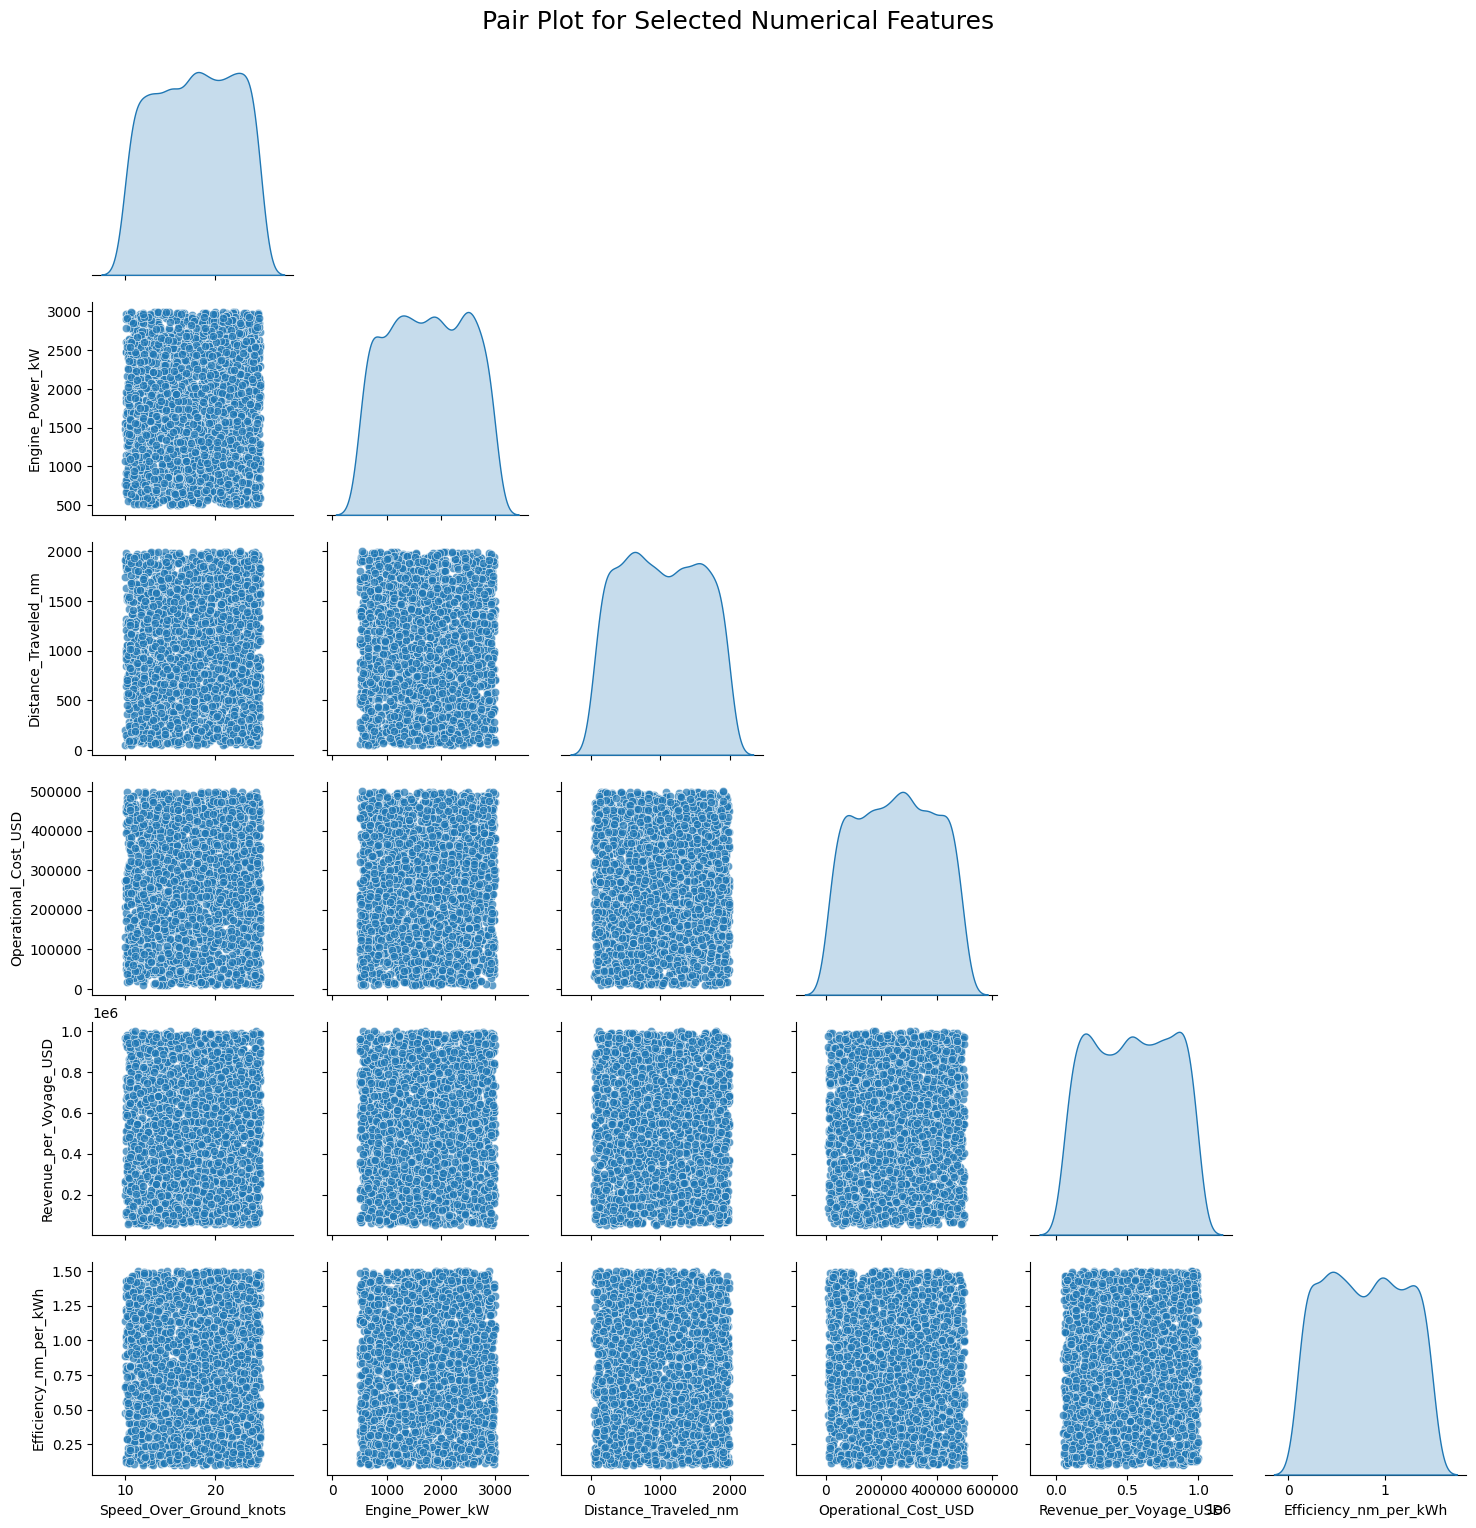

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of numerical features for the pair plot to avoid clutter
selected_features = [
    'Speed_Over_Ground_knots', 
    'Engine_Power_kW', 
    'Distance_Traveled_nm', 
    'Operational_Cost_USD', 
    'Revenue_per_Voyage_USD', 
    'Efficiency_nm_per_kWh'
]

# Generate the pair plot
sns.pairplot(df[selected_features], diag_kind="kde", corner=True, plot_kws={'alpha':0.7})
plt.suptitle('Pair Plot for Selected Numerical Features', y=1.02, fontsize=18)
plt.savefig('Pair Plot for Selected Numerical Features.png', dpi=300, bbox_inches='tight')
plt.show()

# **Exploratory Data Analysis (EDA) Summary**

## **1. Dataset Overview**
- The dataset contains both **numerical** and **categorical features**, spanning ship performance metrics in the West African region.
- Time frame: **June 2023 to June 2024** (weekly data).

---

## **2. Key Findings**
### **Numerical Features**
- All numerical features are well-distributed, with no significant skewness or outliers.
- **Correlation Analysis**:
  - No strong correlations detected between numerical features.
  - Features appear independent, offering diverse insights.

### **Categorical Features**
- **Ship Types**: A mix of Tanker Ships, Fish Carriers, Oil Service Boats, etc.
- **Fuel Type**: Primarily Heavy Fuel Oil (HFO) and Diesel Oil (DO).
- **Distribution**: Each categorical feature is evenly represented, ensuring balanced insights.

### **Time-Based Analysis**
- Clear weekly trends in key metrics like **Operational Costs** and **Efficiency (nm per kWh)**.
- Potential seasonal effects are observed but require further analysis.

---

## **3. Visualization Highlights**
- **Heatmap**: Minimal feature correlation confirms dataset independence.
- **Pair Plot**: Explored relationships among numerical features; no noticeable c


##  **4. Insights for Further Analysis**
- Multivariate Analysis (Pair Plot) suggests independence among most features.
-  Data is **ready for clustering**, as no missing values or anomalies were found.lusteri independence among most features.


### **Data Preprocessing**

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



df_selected = df[selected_features]

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)


## **Kmeans Clustering**

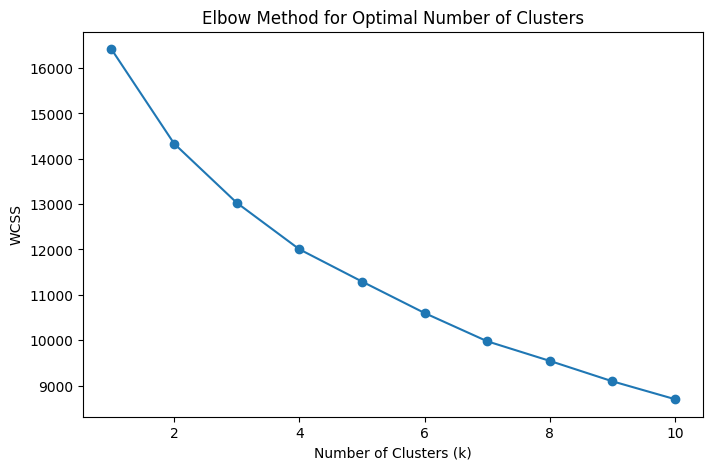

In [61]:
# We will use the Elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.savefig('Elbow Method for Optimal Number of Clusters.png', dpi=300, bbox_inches='tight')
plt.show()


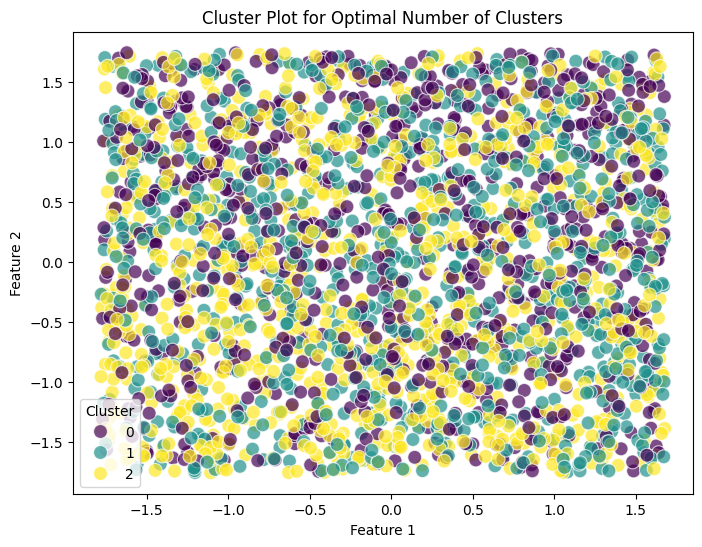

Silhouette Score: 0.11443133722663353


In [62]:
# Apply KMeans with the optimal number of clusters (3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(scaled_data)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=y_kmeans, palette='viridis', s=100, alpha=0.7)
plt.title('Cluster Plot for Optimal Number of Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster', loc='best')
plt.savefig('Cluster Plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate Silhouette Score
sil_score = silhouette_score(scaled_data, y_kmeans)
print(f'Silhouette Score: {sil_score}')


## **Principal Component Analysis**

PCA-based Silhouette Score: 0.34


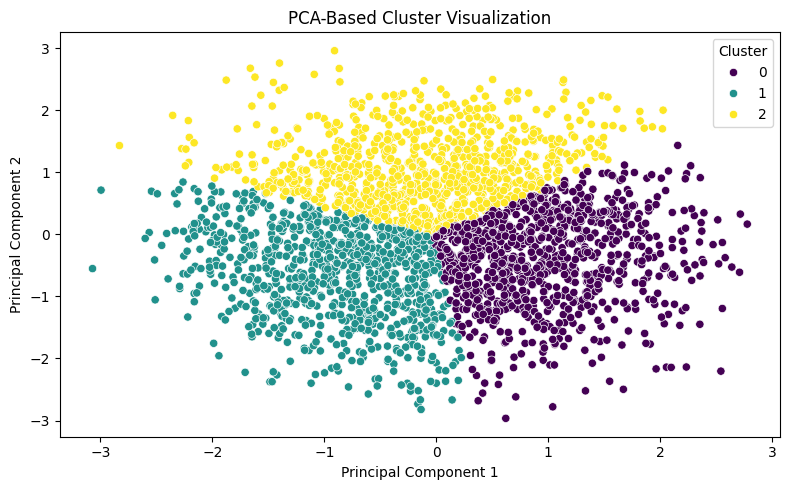

In [64]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
optimal_k = 3  # The number of clusters chosen value
# Performing PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Let run K-Means on the PCA-transformed data
pca_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pca_clusters = pca_kmeans.fit_predict(pca_data)

# Calculating Silhouette Score for PCA-based clustering
pca_silhouette_avg = silhouette_score(pca_data, pca_clusters)
print(f"PCA-based Silhouette Score: {pca_silhouette_avg:.2f}")

# Visualize PCA Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=pca_clusters, palette='viridis')
plt.title('PCA-Based Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


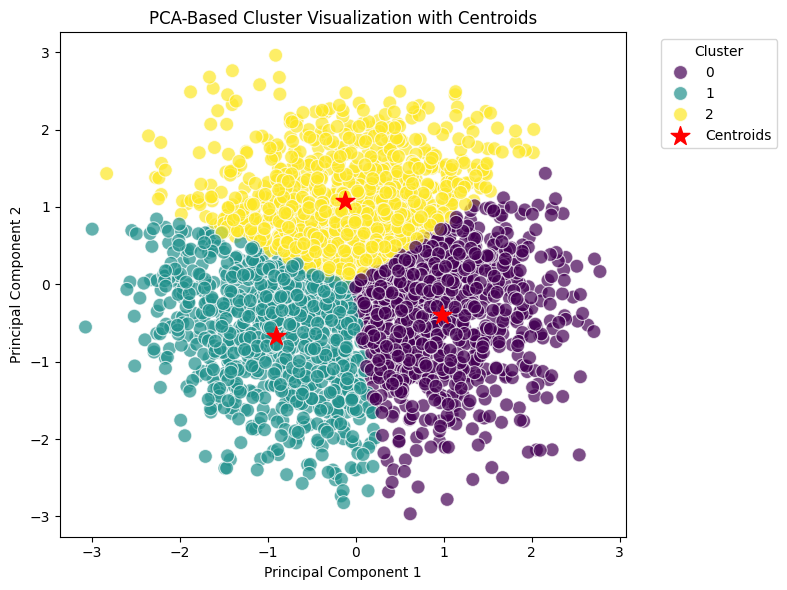

In [65]:
# Enhanced PCA Cluster Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=pca_clusters, palette='viridis', s=100, alpha=0.7)
plt.scatter(pca_kmeans.cluster_centers_[:, 0], pca_kmeans.cluster_centers_[:, 1], c='red', s=200, marker='*', label='Centroids')
plt.title('PCA-Based Cluster Visualization with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Enhanced_PCA_Cluster_Visualization.png', dpi=300, bbox_inches='tight')
plt.show()


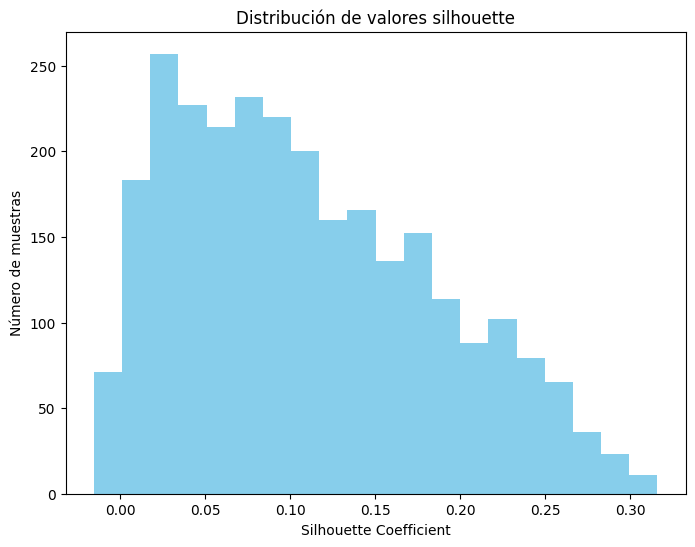

In [76]:
from sklearn.metrics import silhouette_samples
import numpy as np

silhouette_vals = silhouette_samples(scaled_data, pca_clusters)
plt.figure(figsize=(8,6))
plt.hist(silhouette_vals, bins=20, color='skyblue')
plt.title('Distribución de valores silhouette')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Número de muestras')
plt.show()

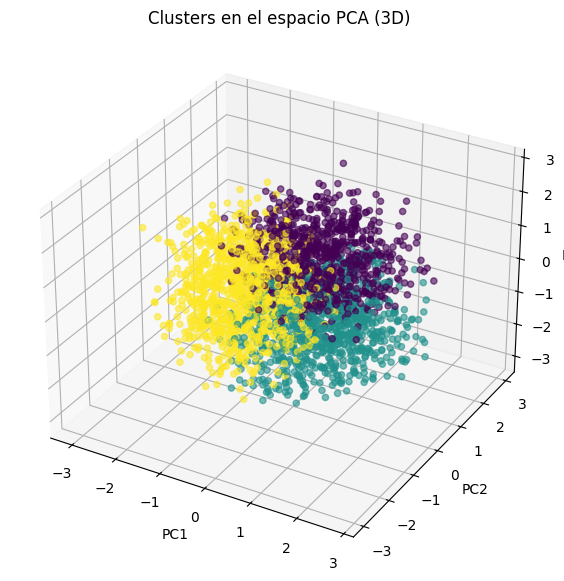

In [81]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# PCA para 3 componentes
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=y_kmeans, cmap='viridis', alpha=0.6)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("Clusters en el espacio PCA (3D)")
plt.show()


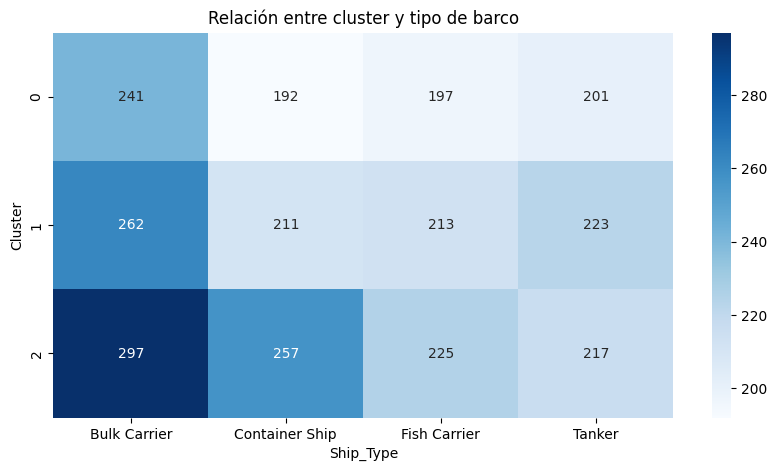

In [83]:
# Asigna los clusters calculados previamente al DataFrame
df['Cluster'] = y_kmeans

# Crea una tabla cruzada entre clusters y tipos de barco
ct = pd.crosstab(df['Cluster'], df['Ship_Type'])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title("Relación entre cluster y tipo de barco")
plt.ylabel("Cluster")
plt.xlabel("Ship_Type")
plt.show()


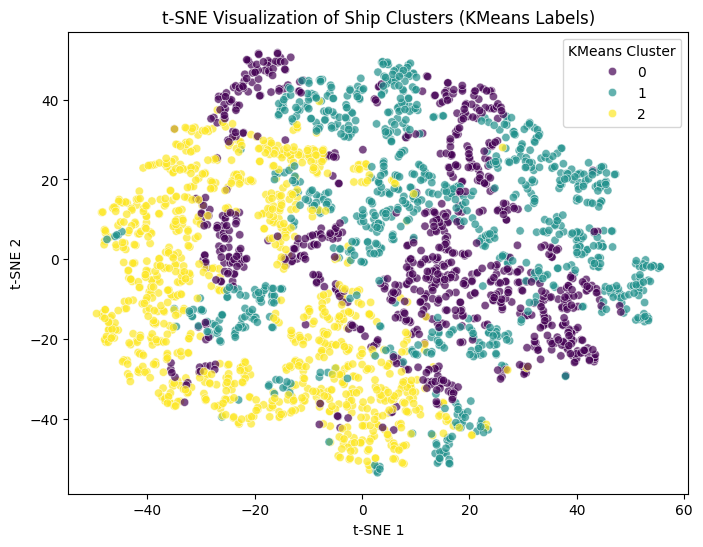

In [86]:
from sklearn.manifold import TSNE

# Reduzco a 2 dimensiones para visualización
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=y_kmeans, palette='viridis', alpha=0.7)
plt.title('t-SNE Visualization of Ship Clusters (KMeans Labels)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title="KMeans Cluster")
plt.show()


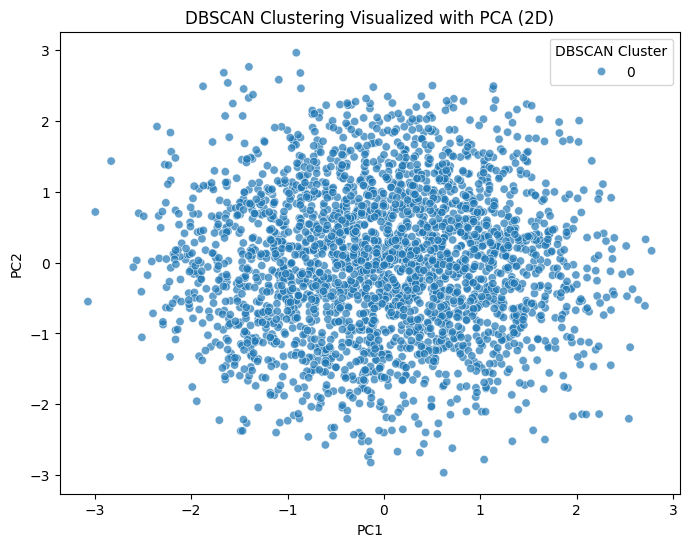

{np.int64(0): np.int64(2736)}


In [85]:
from sklearn.cluster import DBSCAN

# Ajustar los hiperparámetros de DBSCAN si es necesario
dbscan = DBSCAN(eps=1.5, min_samples=10)
db_clusters = dbscan.fit_predict(scaled_data)

# Visualización con PCA (2D)
pca_2d = PCA(n_components=2)
pca_data_2d = pca_2d.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data_2d[:,0], y=pca_data_2d[:,1], hue=db_clusters, palette='tab10', alpha=0.7)
plt.title('DBSCAN Clustering Visualized with PCA (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title="DBSCAN Cluster")
plt.show()

# Recuento de elementos por cluster (donde -1 son outliers/noise para DBSCAN)
import numpy as np
unique, counts = np.unique(db_clusters, return_counts=True)
print(dict(zip(unique, counts)))


## **Cluster Profiling**

In [68]:
# Add PCA-based cluster labels to the original dataset
df['PCA_Cluster'] = pca_clusters
df.to_csv('Ship_Performance_Weekly_Data_with_PCA.csv')

In [69]:
numeric_cols = df.select_dtypes(exclude="O")
cluster_profiles = numeric_cols.groupby('PCA_Cluster').mean()
print(f"Numeric Cluster Profile:{cluster_profiles}")

Numeric Cluster Profile:                                     Date  Speed_Over_Ground_knots  \
PCA_Cluster                                                          
0           2023-12-17 01:04:16.323060480                16.664260   
1           2023-12-21 04:41:15.000000000                16.297460   
2           2023-12-12 18:31:38.109009920                20.214995   

             Engine_Power_kW  Distance_Traveled_nm  Draft_meters  \
PCA_Cluster                                                        
0                2125.336357            792.440252      9.956942   
1                1418.256741            867.417008     10.114782   
2                1706.018145           1398.242972     10.029883   

             Cargo_Weight_tons  Operational_Cost_USD  Revenue_per_Voyage_USD  \
PCA_Cluster                                                                    
0                  1033.867835         207947.821976           633681.353998   
1                  1022.758889         25858

In [70]:
# Including categorical column aggregations
categorical_columns = df.select_dtypes(exclude=['number'])

cluster_profiles_categorical = categorical_columns.groupby(df['PCA_Cluster']).agg(lambda x: x.mode().iloc[0])

# Combine numeric and categorical profiles
final_cluster_profiles = pd.concat([cluster_profiles, cluster_profiles_categorical], axis=1)

print("Final Cluster Profiles:")
print(final_cluster_profiles)

Final Cluster Profiles:
                                     Date  Speed_Over_Ground_knots  \
PCA_Cluster                                                          
0           2023-12-17 01:04:16.323060480                16.664260   
1           2023-12-21 04:41:15.000000000                16.297460   
2           2023-12-12 18:31:38.109009920                20.214995   

             Engine_Power_kW  Distance_Traveled_nm  Draft_meters  \
PCA_Cluster                                                        
0                2125.336357            792.440252      9.956942   
1                1418.256741            867.417008     10.114782   
2                1706.018145           1398.242972     10.029883   

             Cargo_Weight_tons  Operational_Cost_USD  Revenue_per_Voyage_USD  \
PCA_Cluster                                                                    
0                  1033.867835         207947.821976           633681.353998   
1                  1022.758889         25858

### Finalized Cluster Profiles Summary 

| **Feature**                    | **Cluster 0 (Dynamic Performers)** | **Cluster 1 (High Revenue Achievers)** | **Cluster 2 (Long-Distance Specialists)** |
|--------------------------------|------------------------------------|----------------------------------------|-------------------------------------------|
| **Speed Over Ground (knots)**  | 18.75                             | 19.44 (highest)                        | 13.97 (lowest)                            |
| **Engine Power (kW)**          | 2182.98                           | 1513.73                                | 1559.83                                   |
| **Distance Traveled (nm)**     | 741.17                            | 1053.14                                | 1328.16 (highest)                         |
| **Cargo Weight (tons)**        | 1010.82                           | 1023.29                                | 1043.17 (highest)                         |
| **Operational Cost (USD)**     | 271,067.22                        | 286,934.72                             | 211,829.17 (lowest)                       |
| **Revenue per Voyage (USD)**   | 461,507.40                        | 674,715.47 (highest)                   | 406,546.43                                |
| **Efficiency (nm/kWh)**        | 1.04 (highest)                    | 0.53 (lowest)                          | 0.82                                      |
| **Weekly Voyages**             | ~4.91                             | ~4.99                                   | ~4.95                                     |
| **Turnaround Time (hours)**    | ~42.44                            | ~42.03                                  | ~43.22 (highest)                          |
| **Ship Type**                  | Fish Carrier                      | Fish Carrier                           | Fish Carrier                              |
| **Route Type**                 | Long-haul                         | Long-haul                              | Long-haul                                 |
| **Maintenance Status**         | Fair                              | Fair                                   | Fair                                      |
| **Weather Condition**          | Rough                             | Rough                                  | Rough                                     |

---

### Evaluation Results
| **Metric**                     | **Value**      | **Interpretation**                                                   |
|--------------------------------|----------------|----------------------------------------------------------------------|
| **Silhouette Score**           | 0.11           | Suggests weak clustering separation due to overlapping features.     |
| **PCA-based S5houette Score** | 0.34           | Indicates better clustering separation in reduced-dimensional space. |

**Note:**  
PCA visualization and improved silhouette scores highlight identifiable patterns in the clusters. However, further refinement may be needed to enhance cluster distinctions.


### **Insights from Data Quality and Visual Diagnostics**

* **No missing values:** The dataset is fully complete, with no missing values in any feature. This is a strong starting point for robust clustering and modeling.
* **Cluster Cohesion & Separation:**
  The silhouette analysis on the full feature space yields a low average score (\~0.06), indicating the clusters are not well separated and may overlap significantly. This finding is reinforced by both the PCA 3D visualization and the t-SNE plot, which show considerable overlap between cluster groups even in reduced-dimensional projections. The t-SNE visualization, in particular, highlights that while some local grouping is visible, there is no sharp global separation among the clusters defined by KMeans.
* **Clusters vs. Ship Type:**
  The cross-tabulation between cluster assignments and the "Ship\_Type" categorical variable demonstrates that clusters do not align closely with ship types. This may suggest either that new operational patterns are being discovered, or that the clustering does not capture strong, distinct groupings within the dataset.
* **DBSCAN Results:**
  Applying DBSCAN did **not reveal alternative meaningful clusters** under the default parameters; the algorithm assigned nearly all points to a single cluster (or possibly classified all as noise if you see only one color/label). This suggests that the dataset lacks clear, dense subgroups, or that DBSCAN may require careful tuning of its `eps` and `min_samples` parameters to uncover any hidden structure. With the current settings, DBSCAN does **not provide improved segmentation** compared to KMeans.

### **Anomalies in Clustering Analysis**
- While performing the clustering analysis for ship performance, I encountered unexpected challenges, particularly with the cluster profiles of categorical features. The primary anomaly observed was the lack of variation in categorical variables across the identified clusters, which led to similar values across clusters. This resulted in less distinct cluster profiles, making it difficult to extract meaningful insights from the clustering process.

#### **Conclusion & Recommendations (updated)**

* The various clustering diagnostics—including silhouette scores, PCA, t-SNE, and DBSCAN—**consistently indicate that there are no strongly separated, robust clusters in the feature space** with the current approach.
* The observed anomalies related to the categorical features (lack of cluster-to-category alignment) have limited the interpretability and usefulness of the clustering process.
* **Recommendations:**

  * **Feature Engineering:** Revisit the feature set; create new features or transformations that might better reflect operational behaviors or performance patterns.
  * **Clustering Methods:** Further experiment with clustering methods and parameter tuning. For DBSCAN in particular, try a range of `eps` and `min_samples` values, possibly guided by a k-distance plot, to detect smaller-scale or less obvious structures.
  * **Outlier Analysis:** Investigate outliers or apply dimensionality reduction (e.g., PCA, t-SNE) before clustering to highlight latent groupings.
  * **Supervised Alternatives:** If segmentation is a business need, consider leveraging supervised learning (if any labels or targets are available) or semi-supervised clustering approaches.
  * **Domain Review:** Collaborate with domain experts to identify operational events or patterns that might not be evident in the current feature set, and use those insights to guide further data collection or feature construction.

**In summary:**
Despite extensive exploration with KMeans, PCA, t-SNE, and DBSCAN, the data at hand does not support robust, actionable clusters. This analysis provides a strong foundation for further work, but any segmentation strategy should incorporate additional feature development, alternative clusterin